<a href="https://colab.research.google.com/github/pawelc/mymakemore/blob/main/build_makemore_yay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs,chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) + 1

In [8]:
# prompt: sort b by values

# sorted(b.items(), key = lambda kv: -kv[1])

In [9]:
import torch

In [17]:
N = torch.zeros((28,28), dtype=torch.int32)

In [24]:
chars = sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [25]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1

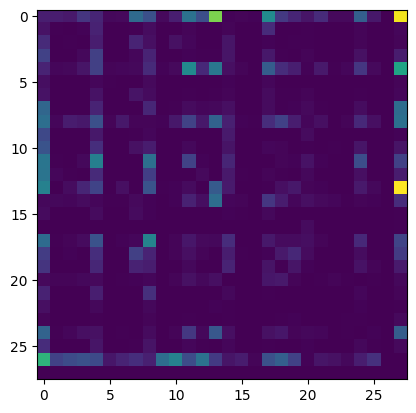

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)